### 데이터 다운로드

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="XDVQNfKzjs2wsKMmC1n7")
project = rf.workspace("test-kibfg").project("wanted-project")
version = project.version(1)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...


### 데이터 형태 파악

In [2]:
# labels
# 1         0.328125            0.50078125          0.33359375          0.7171875
# class     x center(비율)      y center(비율)       width(비율)         height(비율)

In [3]:
label = 1
box = [0.328125, 0.50078125, 0.33359375, 0.7171875]

[[[ 48 137  87]
  [ 47 136  86]
  [ 46 135  85]
  ...
  [ 20 150  97]
  [ 17 147  94]
  [ 11 143  90]]

 [[ 48 137  87]
  [ 47 136  86]
  [ 46 135  85]
  ...
  [ 23 150  98]
  [ 18 148  95]
  [ 14 144  91]]

 [[ 48 135  85]
  [ 48 135  85]
  [ 47 134  84]
  ...
  [ 25 151  99]
  [ 22 148  96]
  [ 16 143  91]]

 ...

 [[ 66 129  87]
  [ 52 118  76]
  [ 30 102  59]
  ...
  [ 19  99  52]
  [ 35 115  68]
  [ 24 105  58]]

 [[ 65 129  87]
  [ 48 114  72]
  [ 16  91  47]
  ...
  [ 23  98  52]
  [ 36 111  65]
  [ 17  95  48]]

 [[ 71 135  93]
  [ 56 125  82]
  [ 29 104  60]
  ...
  [ 30 103  57]
  [ 41 114  68]
  [ 11  86  40]]]


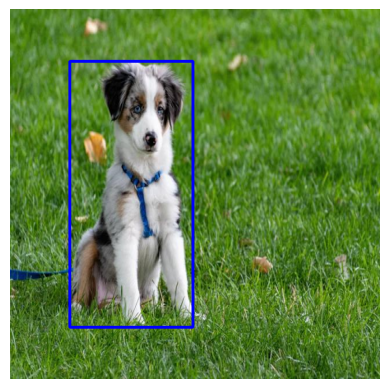

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("./dog_test.jpg")
# image = cv2.imread("C:/wanted/practice_DL/data/images/강아지고양이/dog_test.jpg")
print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape
# 정규화된 좌표를 픽셀 단위로 변환
wc, hc, w, h = box
x1 = int((wc - w / 2) * width)  # 좌상단 x 좌표
y1 = int((hc - h / 2) * height) # 좌상단 y 좌표
x2 = int((wc + w / 2) * width)  # 우하단 x 좌표
y2 = int((hc + h / 2) * height) # 우하단 y 좌표

# 바운딩 박스 그리기
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 4)  # 파란색 박스, 두께 2

# Matplotlib을 사용한 이미지 출력
plt.imshow(image)
plt.axis("off")
plt.show()

### 모델 불러오기 및 학습

In [5]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [6]:
import os
os.getcwd()


'c:\\wanted\\practice_DL\\OpenCV_tutorial'

In [7]:
data_path = "C:\wanted\practice_DL\OpenCV_tutorial\wanted-project-1\data.yaml"

model.train(data=data_path, epochs=50, imgsz=640)

Ultralytics 8.3.78  Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:\wanted\practice_DL\OpenCV_tutorial\wanted-project-1\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning C:\wanted\practice_DL\OpenCV_tutorial\wanted-project-1\train\labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
INFO:albumentations.check_version:A new version of Albumentations is available: 2.0.4 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\wanted\practice_DL\OpenCV_tutorial\wanted-project-1\valid\labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       1.9G       1.27      2.998      1.639         52        640: 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          4          4    0.00327          1     0.0782     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.9G      1.516      3.079      1.753         47        640: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.12it/s]

                   all          4          4    0.00324          1      0.111     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.9G      1.105      3.009      1.516         45        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.32it/s]

                   all          4          4    0.00323          1     0.0511      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.9G      1.293      3.084      1.716         43        640: 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.44it/s]

                   all          4          4    0.00321          1     0.0696     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.9G      1.112      3.027      1.568         50        640: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.54it/s]

                   all          4          4    0.00317          1     0.0417     0.0189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.92G      1.531      3.159      1.911         40        640: 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.50it/s]

                   all          4          4    0.00319          1     0.0697     0.0354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.9G      1.079      3.084      1.523         41        640: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.37it/s]

                   all          4          4    0.00318          1      0.061      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.92G       1.07      2.981      1.521         46        640: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

                   all          4          4     0.0032          1      0.221     0.0377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.92G       1.13      2.944      1.598         48        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.20it/s]

                   all          4          4    0.00319          1      0.222      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.92G     0.9619      2.988       1.54         40        640: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]

                   all          4          4    0.00318          1      0.227      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.93G     0.8773      2.889      1.463         49        640: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.24it/s]

                   all          4          4    0.00317          1      0.289      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.92G     0.8008      2.832      1.463         41        640: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.33it/s]

                   all          4          4    0.00317          1      0.664      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.92G     0.7801      2.817      1.349         43        640: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.19it/s]

                   all          4          4    0.00316          1      0.381      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.92G     0.8809      2.807      1.383         43        640: 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.79it/s]

                   all          4          4    0.00317          1      0.308      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.92G     0.8585      2.942      1.481         35        640: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]

                   all          4          4     0.0032          1      0.556       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.93G     0.8889       2.81      1.426         42        640: 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.02it/s]

                   all          4          4     0.0032          1      0.528        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.92G      1.151      2.772       1.55         46        640: 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.16it/s]

                   all          4          4    0.00322          1      0.539      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.92G     0.9024      2.685      1.436         40        640: 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.41it/s]

                   all          4          4    0.00322          1      0.539      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.93G     0.7919      2.688      1.366         45        640: 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.11it/s]

                   all          4          4    0.00321          1      0.622      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.92G     0.8382      2.745      1.526         35        640: 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.07it/s]

                   all          4          4    0.00321          1      0.622      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.93G      0.687       2.62      1.323         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.35it/s]

                   all          4          4    0.00315          1      0.581      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.92G     0.7608      2.547      1.251         41        640: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.46it/s]

                   all          4          4    0.00315          1      0.581      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.93G     0.6359       2.66      1.231         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.57it/s]

                   all          4          4    0.00312          1      0.622      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.92G     0.8185      2.508      1.271         55        640: 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.27it/s]

                   all          4          4    0.00312          1      0.622      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.93G     0.7841      2.501      1.379         45        640: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.11it/s]

                   all          4          4    0.00311          1      0.518      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.92G     0.8053      2.528      1.391         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.55it/s]

                   all          4          4    0.00311          1      0.518      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.93G     0.8529      2.592      1.476         34        640: 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.20it/s]

                   all          4          4    0.00311          1      0.506       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.92G     0.9027      2.474      1.369         47        640: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all          4          4    0.00311          1      0.506       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.93G     0.7871      2.474      1.309         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.39it/s]

                   all          4          4    0.00313          1      0.512      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.92G     0.8409      2.449      1.351         40        640: 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]

                   all          4          4    0.00313          1      0.512      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.93G     0.7821      2.401      1.322         44        640: 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]

                   all          4          4    0.00312          1      0.498      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.92G     0.5875      2.356      1.203         40        640: 100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.21it/s]

                   all          4          4    0.00312          1      0.498      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.93G     0.9229      2.559      1.608         30        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.11it/s]

                   all          4          4    0.00316          1      0.515      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.92G     0.6864      2.323      1.296         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.19it/s]

                   all          4          4    0.00316          1      0.515      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.93G     0.6626      2.226      1.233         41        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.63it/s]

                   all          4          4    0.00317          1      0.539      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.92G     0.6423      2.197      1.212         48        640: 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.23it/s]

                   all          4          4    0.00317          1      0.539      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.93G     0.5225      2.286       1.15         39        640: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.85it/s]

                   all          4          4     0.0032          1      0.531      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.92G     0.6799      2.336      1.264         44        640: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.63it/s]

                   all          4          4     0.0032          1      0.531      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.93G     0.7715      2.237      1.313         40        640: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]

                   all          4          4    0.00322          1      0.556      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.92G     0.6675      2.134      1.229         46        640: 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.39it/s]

                   all          4          4    0.00322          1      0.556      0.409


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.93G      0.965      2.613      1.667         17        640: 100%|██████████| 1/1 [00:07<00:00,  7.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all          4          4    0.00321          1      0.597       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.92G     0.5573      2.271      1.208         17        640: 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.16it/s]

                   all          4          4    0.00321          1      0.597       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.93G     0.4718      2.421       1.13         17        640: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4          4    0.00319          1      0.597      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.92G     0.9197      2.684      1.625         17        640: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.45it/s]

                   all          4          4    0.00319          1      0.597      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.93G     0.6417      2.399      1.287         17        640: 100%|██████████| 1/1 [00:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.55it/s]

                   all          4          4    0.00322          1      0.597      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.92G     0.5956      2.424      1.296         17        640: 100%|██████████| 1/1 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.68it/s]

                   all          4          4    0.00322          1      0.597      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.93G      0.633       2.51       1.31         17        640: 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.02it/s]

                   all          4          4    0.00322          1      0.597      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.92G     0.5849      2.285      1.311         17        640: 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.89it/s]

                   all          4          4    0.00322          1      0.597      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.93G     0.5535      2.288       1.22         17        640: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.43it/s]

                   all          4          4    0.00323          1      0.622      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.92G     0.5694       2.24      1.263         17        640: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.09it/s]

                   all          4          4    0.00323          1      0.622      0.473



50 epochs completed in 0.015 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 5.5MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.78  Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 22.92it/s]


                   all          4          4    0.00323          1      0.622      0.473
                   cat          1          1    0.00299          1      0.332      0.298
                   dog          3          3    0.00347          1      0.913      0.647
Speed: 0.4ms preprocess, 4.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\train11


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002A5AE27E890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0